In [22]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

from sklearn.model_selection import train_test_split

In [28]:
# Import the MNIST data-set
# This data has alreay been converted to CSV and split into test and training sets, 
# to get more control over this we we will merge these sets then split them again later down the line
mnist_a= pd.read_csv('mnist/mnist_train.csv')
mnist_b = pd.read_csv('mnist/mnist_test.csv')
mnist = pd.concat([mnist_a, mnist_b])

In [16]:
# Quick look at the data
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Separate labels and one-hot-encode them
X = mnist
y = X.pop('label')
y =pd.get_dummies(y)

y.head()

#Separate out training and test/validation data
X_train, X_v, y_train, y_v = \
    train_test_split(X, y, stratify=y, train_size=0.70)

X_val, X_test, y_val, y_test = \
    train_test_split(X_v, y_v, stratify=y_v, train_size=0.66)

In [37]:
# Set up the model
input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=10, activation='softmax')
])

In [38]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.0001,
    patience = 25,
    restore_best_weights = True
)

Epoch 1/50
196/196 [==============================] - 6s 24ms/step - loss: 0.4231 - acc: 0.8716 - val_loss: 0.1547 - val_acc: 0.9552
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 0.1732 - acc: 0.9477 - val_loss: 0.1192 - val_acc: 0.9649
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 0.1289 - acc: 0.9602 - val_loss: 0.1216 - val_acc: 0.9680
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0956 - acc: 0.9701 - val_loss: 0.1227 - val_acc: 0.9711
Epoch 5/50
196/196 [==============================] - 4s 20ms/step - loss: 0.0826 - acc: 0.9735 - val_loss: 0.1258 - val_acc: 0.9736
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0692 - acc: 0.9778 - val_loss: 0.1235 - val_acc: 0.9746
Epoch 7/50
196/196 [==============================] - 4s 20ms/step - loss: 0.0561 - acc: 0.9814 - val_loss: 0.1190 - val_acc: 0.9770
Epoch 8/50
196/196 [==============================] - 4s 20ms/step - 

<Axes: title={'center': 'Accuracy'}>

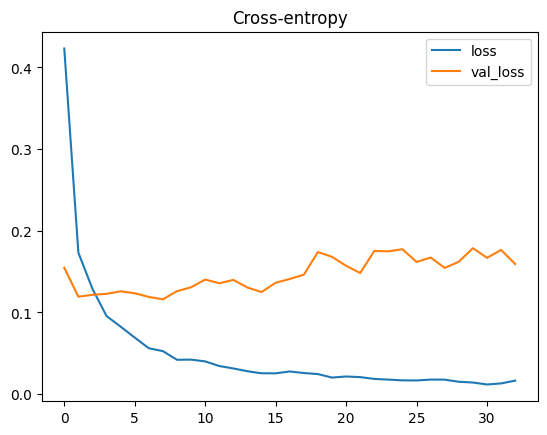

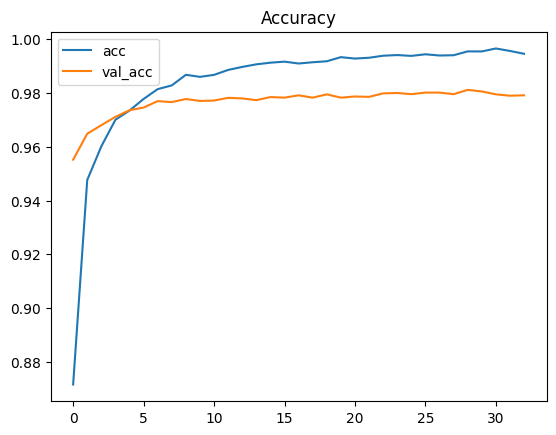

In [39]:
# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=250,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['acc', 'val_acc']].plot(title="Accuracy")